### Importing the required libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data into a Pandas Dataframe using pd.read_csv

In [80]:
data = pd.read_csv("../data/tested.csv")

### Displaying the first 5 rows of the dataset using data.head() method

In [81]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Displaying the last 5 rows in the dataset using the data.tail() method

In [82]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [83]:
# Checking the columns in the dataset with data.columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
# Checking the data types of the columns in the dataset
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [85]:
# Printing the total number of columns in the dataset using the len() function
len(data)

418

### Checking for the number of null data in each column in the dataset

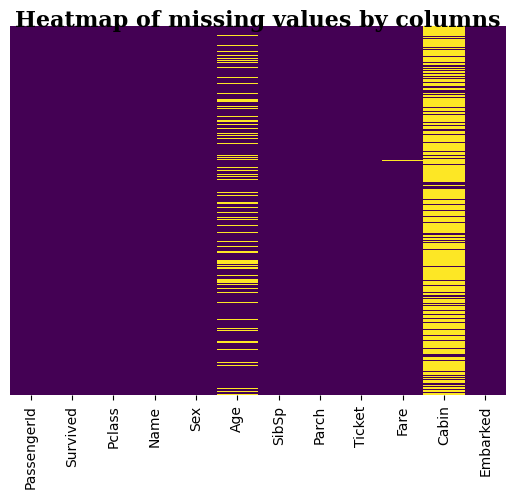

In [86]:
fig2 = sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')
fig2.text(0.13,0.81,"Heatmap of missing values by columns", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

In [87]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [88]:
# We'll fill the missing values in the cabin with the mean age value.

mean_age=int(data['Age'].mean())
#using this we can replace null values with the mean of age column

data['Age'] = data['Age'].fillna(mean_age)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [89]:
# We'll fill the missing values in the cabin with the mode cabin value (the most frequent cabin name).

print(data['Cabin'].mode())

data['Cabin'].fillna(data['Cabin'].mode()[0])
data.isnull().sum()

0    B57 B59 B63 B66
Name: Cabin, dtype: object


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [90]:
# Checking for duplicate rows


if len(data) > len (data.drop_duplicates()):
    print("Duplicate Rows :")
else:
    print ("There are no duplicate rows")

There are no duplicate rows


In [91]:
# Removing Duplicates if they exist (although there are no duplicate rows)

data = data.drop_duplicates()
len (data)

418

In [92]:
# Checking Data Types

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Converting Data Types

The Pclass (Passenger Class), PassengerID and Survived are better more appropriately String data types since they represent categorical information.

In [93]:
# Convert PassengerId and Pclass from Int to string 

data["PassengerId"] = data["PassengerId"].astype(str)
data["Pclass"] = data["Pclass"].astype(str)

# Checking that the data type conversion worked
data.dtypes

PassengerId     object
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Displaying Summary Statistics using the data.describe() method

In [94]:
data.describe()

,Survived,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,0.363636,30.216507,0.447368,0.392344,35.627188
std,0.481622,12.635016,0.896760,0.981429,55.907576
min,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,35.750000,1.000000,0.000000,31.500000
max,1.000000,76.000000,8.000000,9.000000,512.329200


In [95]:
# Grouping by Pclass and Survived (we can use the .sum() method to add all the 
# Survived by passenger class since survived is "1" and not survived is "0"

data.groupby(["Pclass"])["Survived"].sum()

Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64

In [96]:
# Average age of Survived vs Not Survived

data.groupby(["Survived"])["Age"].mean()

Survived
0    30.210188
1    30.227566
Name: Age, dtype: float64

In [97]:
# Gender distribution amongst passengers

data.groupby(["Sex"])["PassengerId"].count()

Sex
female    152
male      266
Name: PassengerId, dtype: int64

In [98]:
# Survival by Gender and Class

data.groupby(["Pclass", "Sex"])["Survived"].sum()

Pclass  Sex   
1       female    50
        male       0
2       female    30
        male       0
3       female    72
        male       0
Name: Survived, dtype: int64

### Create Age Groups and binning them using the pd.cut() method

In [99]:
bins = [0, 18, 40, 60, np.inf]
names = ['<18', '18-40', '40-60', '60+']

data['AgeGroup'] = pd.cut(data['Age'], bins, labels=names)

In [100]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [101]:
# Survival by AgeGroup

data.groupby(["AgeGroup"], observed=True)["Survived"].sum()

AgeGroup
<18      24
18-40    98
40-60    26
60+       4
Name: Survived, dtype: int64

### Data Visualisations


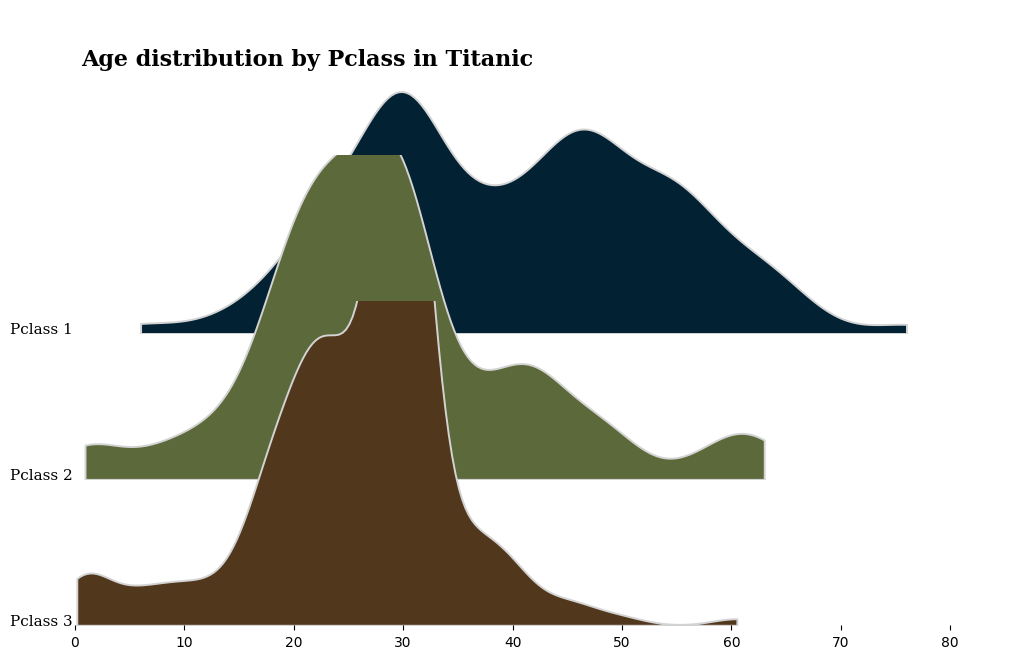

In [102]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray',color=c, alpha=1) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()    

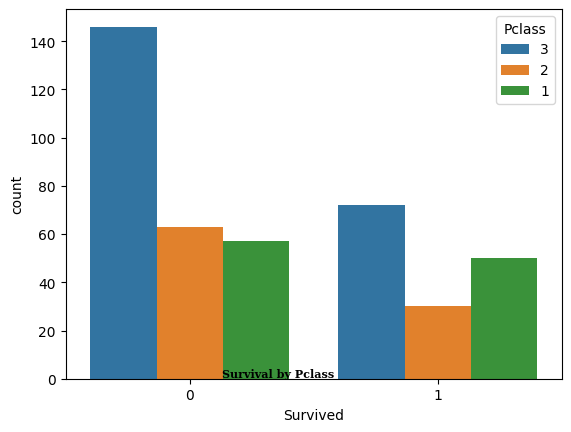

In [103]:
fig3 = sns.countplot(x='Survived',data=data,hue = 'Pclass')
fig3.text(0.13,0.81,"Survival by Pclass", fontweight="bold", fontfamily='serif', fontsize=8)
plt.show() 

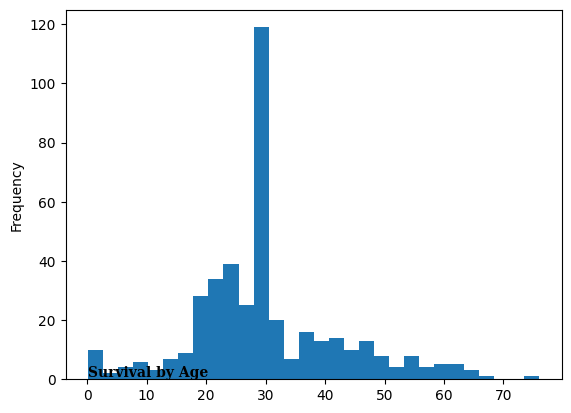

In [104]:
fig4 = data['Age'].dropna().plot.hist(bins=30)
fig4.text(0.13,0.81,"Survival by Age", fontweight="bold", fontfamily='serif', fontsize=10)
plt.show() 

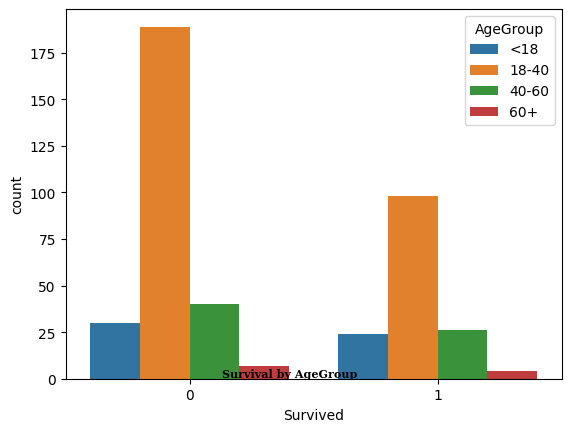

In [105]:
fig3 = sns.countplot(x='Survived',data=data,hue = 'AgeGroup')
fig3.text(0.13,0.81,"Survival by AgeGroup", fontweight="bold", fontfamily='serif', fontsize=8)
plt.show() 

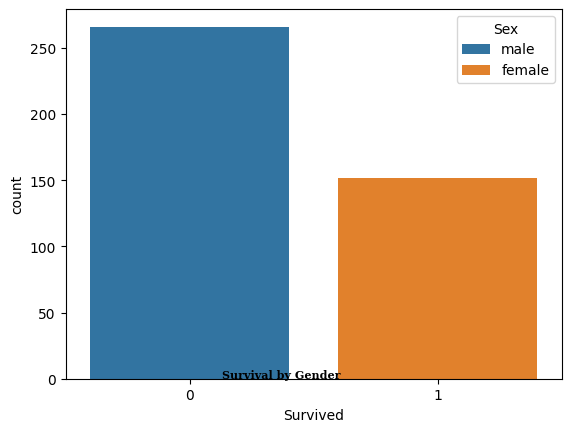

In [106]:
fig3 = sns.countplot(x='Survived',data=data,hue = 'Sex')
fig3.text(0.13,0.81,"Survival by Gender", fontweight="bold", fontfamily='serif', fontsize=8)
plt.show() 